# Instacart Market Basket Analysis

## Importing the required libraries

In [1]:
# Import the libraries you'll need for this analysis
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
# Note: These files use semicolon (;) as the separator instead of comma
orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

## Analyze your data

In the cells below, display the datasets using `.info()` and `.head()` to gain insights into their structure and content.

- `.info()`: Provides a concise summary of the dataset, including the data types, non-null counts, and memory usage.
- `.head()`: Displays the first few rows of the dataset, offering a quick overview of the data values.

In [3]:
# In this cell, type "orders" below this line and execute the cell
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [4]:
# In this cell, type "products" below this line and execute the cell
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [5]:
# departments table
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [6]:
# aisles table
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [7]:
# order_products table
order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


Repeat this process for each dataset to understand the structure, including the types of columns and rows they contain. Add additional code cells as needed for your analysis.

In [8]:
# In this cell, type "orders.info() below this line and execute the cell
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


The "Non-Null Count" column provides information about any missing values in each column of the dataset. With a total of 478,952 entries, observe any columns where the non-null count is less than this number to identify missing values.

In [9]:
# In this cell, run orders_products.info() below, but include the argument show_counts=True since this is a large file.
order_products.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [10]:
# diagnosting deparments info
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [11]:
# diagnosting products info
products.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [12]:
# diagnosting aisles info
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


Repeat the use of .info() on the remaining datasets to identify missing values and understand their structure. Check the "Non-Null Count" for each dataset to spot any columns with missing values.

## Find and Remove Missing Values

We noticed that some columns contain missing values.

Here are some useful code snippets:

```python
# Identify missing values in each column
print(dataset.isnull().sum())

# Display rows where a specific column has missing values
print(dataset[dataset['column_name'].isna()])

# Confirm no missing values remain
print(dataset.isnull().sum())
```

### `products` Data Frame

We will begin by addressing the missing values in the `products` data frame.

In [13]:
# Display rows where the product_name column has missing values
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


It seems suspicious that all rows with missing `product_name` might be associated with `aisle_id` 100 and `department_id` 21. Let’s verify this by checking if any rows with missing `product_name` have an `aisle_id` different from 100 and 21. This will help us confirm if the issue is isolated to this aisle or spread across others.

In [14]:
# Combine conditions to check for missing product names in aisles other than 100
products[(products['product_name'].isna()) & (products['aisle_id'] != 100)]

,product_id,product_name,aisle_id,department_id


In [15]:
# Combine conditions to check for missing product names in aisles other than 21
products[(products['product_name'].isna()) & (products['department_id'] != 21)]

,product_id,product_name,aisle_id,department_id


To better understand the missing product_name values, let’s determine what department_id 21 and aisle_id 100 represent by referencing the departments and aisles tables.

In [16]:
# What is this aisle and department?
# Check aisle_id 100
aisles[aisles['aisle_id'] == 100]

,aisle_id,aisle
99,100,missing


In [17]:
# Check department_id 21
departments[departments['department_id'] == 21]

,department_id,department
20,21,missing


In [18]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

### `orders` data frame

Now let's fill in missing values from the `orders` table.

In [19]:
# Display rows where the days_since_prior_order column has missing values
orders[orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [20]:
# Are there any missing values where it's not a customer's first order?
orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


All of the missing `'days_since_prior_order'` values correspond to a customer's first ever order. This makes sense because there is no prior order! We'll leave the values as `NaN` so the column can remain numeric. Also, the `NaN` values shouldn't interfere with any calculations we might do using this column.

### `order_products` data frame

Now let's fill in missing values from the order_products table.

In [21]:
# Display rows where the add_to_cart_order column has missing values
order_products[order_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [22]:
# Use .min() and .max() to find the minimum and maximum values for this column.
order_products['add_to_cart_order'].min() # minimum for add_to_cart_order

1.0

In [23]:
order_products['add_to_cart_order'].max() # maximum for add_to_cart_order

64.0

In [24]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
add_to_cart_order = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
add_to_cart_order

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [25]:
# Do all orders with missing values have more than 64 products?
order_products[order_products['order_id'].isin(add_to_cart_order)].groupby('order_id').size().min()

65

In [26]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


For some reason, any item placed in the cart 65th or later has a missing value in the `'add_to_cart_order'` column. Maybe the data type of that column in the database could only hold integer values from 1 to 64. We've decided to replace the missing values with a code value, 999, that represents an unknown placed in cart order above 64. We also converted the column to integer data type. We just need to be careful to remember this if we perform calculations using this column during our analysis.

Other sensible code values we could've used are 0 or -1 because they don't show up elsewhere in the dataset and they don't have any real physical meaning for this variable.

Also note that, for orders with exactly 65 items, we could replace the missing value with 65. But we're going to neglect that for now since we can't determine the 65th item for all orders with 66 items or more.

## Find and Remove Duplicate Values from All the Datasets

Each dataset may contain duplicate rows, which can lead to redundancy and affect the accuracy of our analysis. To handle this:

1. Use the `.duplicated()` method to identify duplicate rows. This method returns a Boolean series where `True` indicates a duplicate row.
2. Apply the `.drop_duplicates()` method to remove these duplicate rows, ensuring a cleaner dataset.
3. Optionally, you can set the `keep` parameter in `.drop_duplicates()` to specify which duplicate to retain (`'first'` or `'last'`).

Here is some example code for reference:
```python
# Check for duplicates
print(dataset.duplicated().sum())  # Number of duplicate rows

# View duplicate rows
print(dataset[dataset.duplicated()]

# Remove duplicates
dataset = dataset.drop_duplicates().reset_index(drop=True)

# Confirm removal
print(dataset.duplicated().sum())  # Should return 0
```

Repeat this process for all datasets to ensure they are free of duplicate rows.

### `orders` data frame

In [27]:
# Find the number of duplicate rows in the orders dataframe
orders[orders.duplicated()].count()

order_id                  15
user_id                   15
order_number              15
order_dow                 15
order_hour_of_day         15
days_since_prior_order    13
dtype: int64

In [28]:
# View the duplicate rows
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [29]:
# Remove duplicate orders
orders = orders.drop_duplicates()

In [30]:
# Double check for duplicate rows
orders.duplicated().sum()

0

### `products` data frame

In [31]:
# Check for fully duplicate rows
duplicate_rows = products.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [32]:
# Check for just duplicate product IDs using subset='product_id' in duplicated()
products.duplicated(subset='product_id').sum()

0

Hint: To identify duplicate product names more effectively, convert the names to lowercase for consistent comparison. Use the .str.lower() method on the product_name column to standardize the text before checking for duplicates.

In [33]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'].str.lower().duplicated().sum()

1361

Let's see what that looks like in our dataset :

In [34]:
products[products['product_name'].str.lower() == 'high performance energy drink']

,product_id,product_name,aisle_id,department_id
22540,22541,High Performance Energy Drink,64,7
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7


In [35]:
# Drop duplicate product names (case insensitive)
products = products.drop_duplicates(subset='product_name').reset_index(drop=True)
products['product_name'].str.lower().duplicated().sum()

104

### `departments` data frame

In [36]:
# Check for duplicate entries in the departments dataframe
# departments[departments.duplicated()]
departments.duplicated().sum()

0

### `aisles` data frame

In [37]:
# Check for aisles entries in the departments dataframe
aisles.duplicated().sum()

0

### `order_products` data frame

In [38]:
# Check for duplicate entries in the order_products dataframe
order_products.duplicated().sum()

0

We have now successfully cleaned our data. Let's begin our exploratory data analysis.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

To verify that the values in the `order_hour_of_day` and `order_dow` columns are sensible:

1. **Check unique values**: Use `.unique()` on each column to extract all distinct values present.
2. **Sort the results**: Use `sorted()` to arrange the unique values in ascending order for easier verification.
3. **Validate ranges**:
   - Ensure `order_hour_of_day` values range from 0 to 23 (representing hours of the day).
   - Ensure `order_dow` values range from 0 to 6 (representing days of the week).

This process confirms that the data aligns with expected ranges and there are no out-of-bound or invalid entries.

In [39]:
#check the .unique() order_hour_of_day'
orders['order_hour_of_day'].unique()

array([13, 12, 19, 20, 11,  8, 18, 15, 16,  9, 22, 10,  0, 14, 17,  1,  7,
        6,  2, 21,  3, 23,  5,  4])

In [40]:
#check the .unique() order_dow'
orders['order_dow'].unique()

array([6, 5, 0, 4, 3, 1, 2])

In [41]:
# sort the results for hour of days
sorted_unique_hour_of_day = sorted(orders['order_hour_of_day'].unique())
# sorted_unique_hour_of_day

In [42]:
# sort the results for order dow
sorted_unique_order_dow = sorted(orders['order_dow'].unique())
# sorted_unique_order_dow

In [43]:
# Validating the ranges for order hour of day
print(f"Hour of day values range from {min(sorted_unique_hour_of_day)} to {max(sorted_unique_hour_of_day)}")

Hour of day values range from 0 to 23


In [44]:
# Validating the ranges for order dow
print(f"Days of week values range from {min(sorted_unique_order_dow)} to {max(sorted_unique_order_dow)}")

Days of week values range from 0 to 6


### [A2] What time of day do people shop for groceries?

To determine the time of day people shop for groceries, analyze the order_hour_of_day column in the orders dataset. Use .value_counts() to count the number of orders placed at each hour, and then sort the results by the hour for a clear chronological order.

Finally, visualize the data with a bar plot to easily observe the shopping trends across different times of the day.

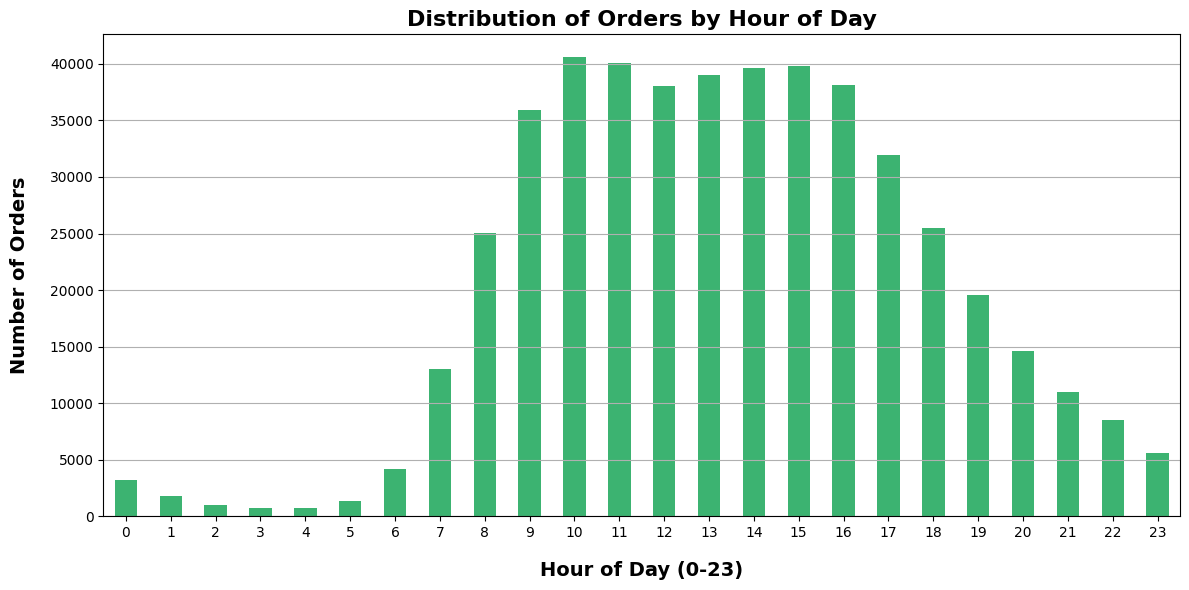

In [45]:
# orders['order_hour_of_day'].value_counts()
hourly_orders = orders['order_hour_of_day'].value_counts().sort_index()

# Visualization for Orders by Hour of Day
hourly_orders.plot(
    kind = 'bar',
    figsize = (12,6),
    title = 'Distribution of Orders by Hour of Day',
    color = 'mediumseagreen',
)
plt.grid(True, axis = 'y')
plt.xticks(rotation = 0)
plt.xlabel('Hour of Day (0-23)',labelpad=15 , size=14, weight='bold')
plt.ylabel('Number of Orders',labelpad=15 , size=14, weight='bold')
plt.title('Distribution of Orders by Hour of Day', size=16, weight='bold')
plt.tight_layout()

plt.show()

Most orders occur between 9:00 AM and 5:00 PM, with peaks at 10:00 AM and 3:00 PM

### [A3] What day of the week do people shop for groceries?

To figure out what day of the week people shop for groceries, analyze the order_dow column in the orders dataset. Use .value_counts() to count the number of orders for each day of the week, and then sort the results by the day index to maintain the correct order.

Visualize the data with a bar plot to clearly observe shopping patterns across the days of the week.

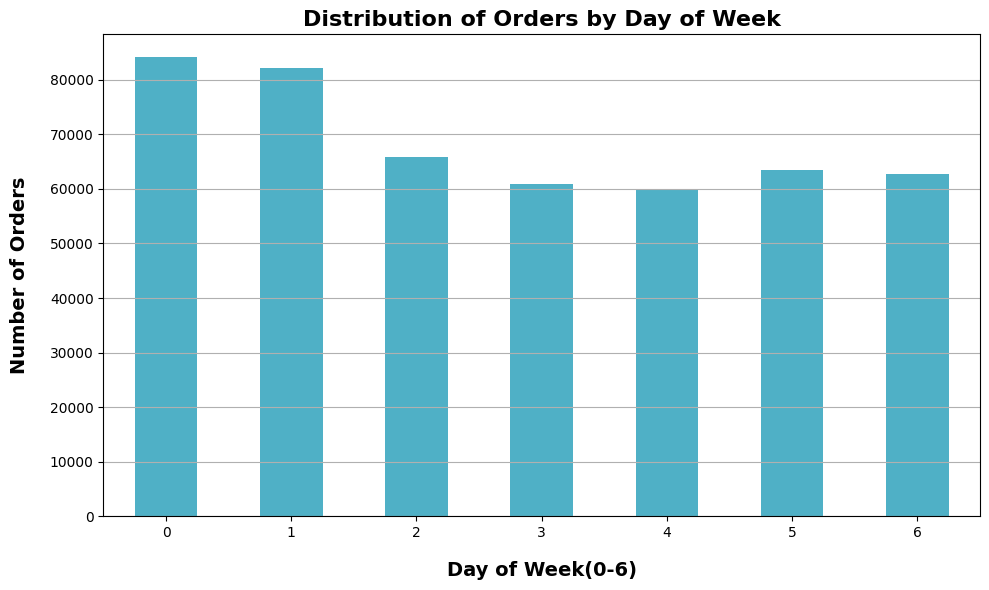

In [46]:
week_orders = orders['order_dow'].value_counts().sort_index()
week_orders.plot(
    kind = 'bar',
    color = '#4FB0C6', #color teal
    figsize = (10,6),
)
plt.grid(True, axis = 'y')
plt.xticks(rotation = 0)
plt.xlabel('Day of Week(0-6)', size=14,labelpad=15, weight='bold')
plt.ylabel('Number of Orders', size=14,labelpad=15, weight='bold')
plt.title('Distribution of Orders by Day of Week', size=16, weight='bold')
plt.tight_layout()
plt.show()

The data dictionary does not state which integer corresponds to which day of the week. Assuming Sunday = 0, then people place more orders at the beginning of the week (Sunday and Monday).

### [A4] How long do people wait until placing another order?

To understand how long people wait before placing another order, analyze the days_since_prior_order column in the orders dataset. Use .value_counts() to count how many orders were placed for each interval of days, then sort the results by the number of days for clarity.

Visualize the data using a bar plot to observe patterns in ordering frequency over time.

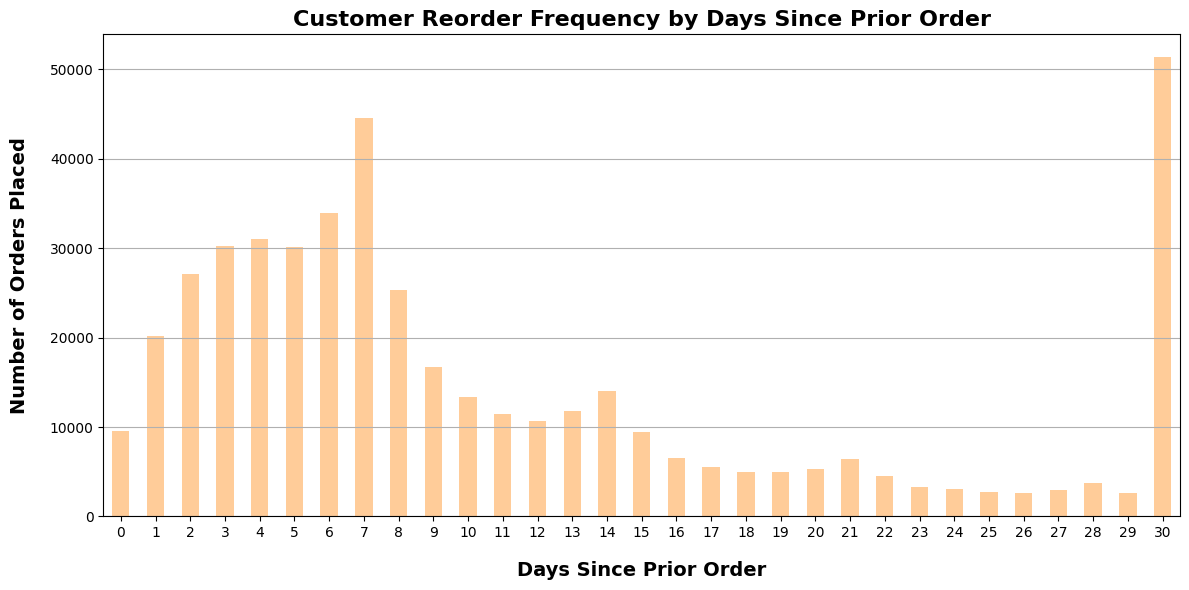

In [47]:
# median_value = orders['days_since_prior_order'].median()
# orders.loc[orders['days_since_prior_order'].isna().index]['days_since_prior_order']=median_value

# Setting Prior Order & Sorting Value
prior_order = orders['days_since_prior_order'].value_counts().sort_index()
prior_order.index = prior_order.index.astype(int) #Changing the index value from float to int

# Plot
prior_order.plot(
    kind = 'bar',
    color = '#FFCC99', #color teal
    figsize = (12,6),
)
plt.grid(True, axis = 'y')
plt.xticks(rotation = 0)
plt.xlabel('Days Since Prior Order', size=14,labelpad=15, weight='bold')
plt.ylabel('Number of Orders Placed', size=14,labelpad=15, weight='bold')
plt.title('Customer Reorder Frequency by Days Since Prior Order', size=16, weight='bold')
plt.tight_layout()
plt.show()

The 0 values probably correspond to customers who placed more than one order on the same day.

The max value of 30 days and the high spike at that value is puzzling though. The spike might be explained by people who set up recurring subscriptions to automatically order once a month. But that doesn't explain why there are no values above 30 days. I would expect many customers to place orders less often than once a month. Maybe those customers were intentionally excluded from the dataset.

Disregarding the spike at 30 days, most people wait between 2 to 10 days in between orders. The most common wait time is 7 days. In other words, it's common for people to place weekly grocery orders. Interestingly, in the tail of the distribution we also see small spikes at 14, 21, and 28 days. These would correspond to orders every 2, 3, or 4 weeks.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

To determine if there’s a difference in the `order_hour_of_day` distributions on Wednesdays and Saturdays, follow these steps:

1. **Create masks** for Wednesday (`order_dow == 3`) and Saturday (`order_dow == 6`) to filter the orders data.
2. **Count the order hours** for each day using `.value_counts()` and sort them by hour with `.sort_index()` for clarity.
3. **Combine the counts** for both days into a single DataFrame using `pd.concat()`, and label the columns for easier interpretation.

After preparing the data, plot histograms for both days to visually compare the distribution of order times. Look for patterns such as peaks or differences in the busiest times.

In [48]:
# Filter data for Wednesday (order_dow == 3) and Saturday (order_dow == 6)
wednesday = orders[(orders['order_dow'] == 3)]
saturday = orders[(orders['order_dow'] == 6)]

In [49]:
# Extract the order_hour_of_day for each
wednesday_hours = wednesday['order_hour_of_day'].value_counts().sort_index()
saturday_hours = saturday['order_hour_of_day'].value_counts().sort_index()

In [50]:
#Combine the counts
combined_counts = pd.concat([wednesday_hours, saturday_hours], axis=1)

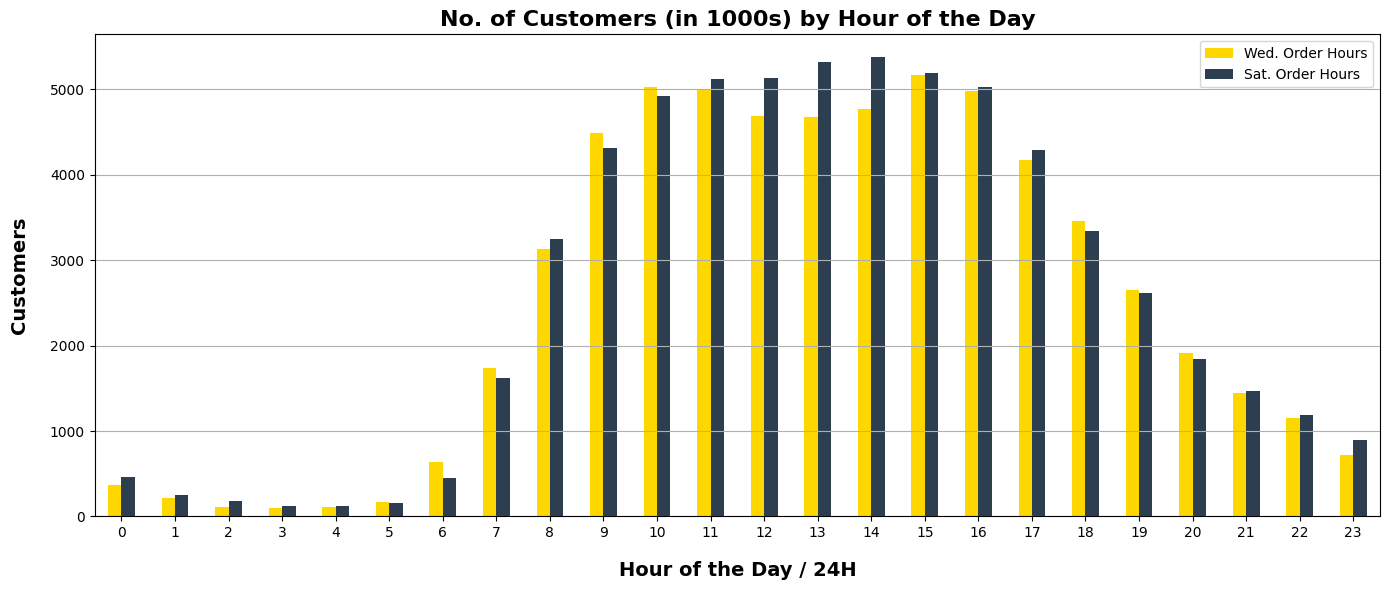

In [51]:
# Step 4: Plot histograms for both days side by side
combined_counts.columns = ['wed_order_hours', 'sat_order_hours']
combined_counts.plot(kind = 'bar',width=.50,figsize=[14,6], color=['#FFD700', '#2C3E50'])
plt.title('No. of Customers (in 1000s) by Hour of the Day', size=16, weight='bold')
plt.xlabel(xlabel= 'Hour of the Day / 24H',labelpad=15, size=14, weight='bold')
plt.ylabel(ylabel= 'Customers',labelpad=15, size=14, weight='bold')
plt.grid(True, axis = 'y')
# plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.xticks(rotation=0)
plt.legend(['Wed. Order Hours','Sat. Order Hours'])
plt.tight_layout()
plt.show()

There's a small dip from 11h to 13h on Wednesdays. This dip is absent on Saturdays. Maybe this dip can be attributed to people who don't use Instacart because they have lunch somewhere between 11h and 13h.

### [B2] What's the distribution for the number of orders per customer?

To explore the distribution of the number of orders per customer:

1. **Group the data** by `user_id` to calculate the total number of orders for each customer. Use `.groupby('user_id')` and count the `order_id` for each group.
2. **Sort the results** using `.sort_values()` for better readability.
3. **Visualize the distribution** using a histogram to observe how many orders most customers typically place.

Adjust the number of bins in the histogram to refine the visualization and better capture the pattern.

In [52]:
print(orders.groupby('user_id')['order_id'].count().sort_values())
distribution = orders.groupby('user_id')['order_id'].count().sort_values()

user_id
152331     1
139876     1
60408      1
139873     1
139871     1
          ..
66664     24
148162    24
78375     25
193164    26
149605    28
Name: order_id, Length: 157437, dtype: int64


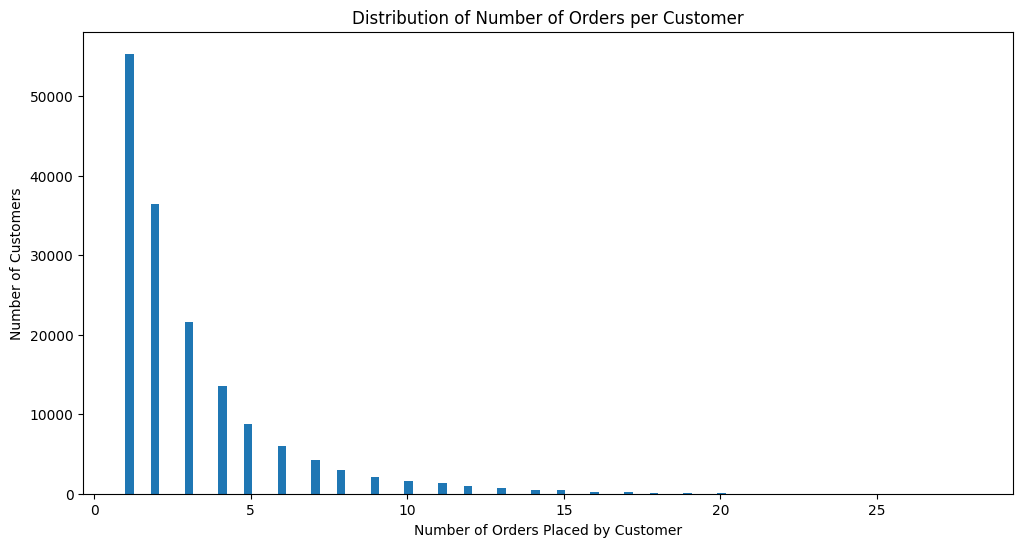

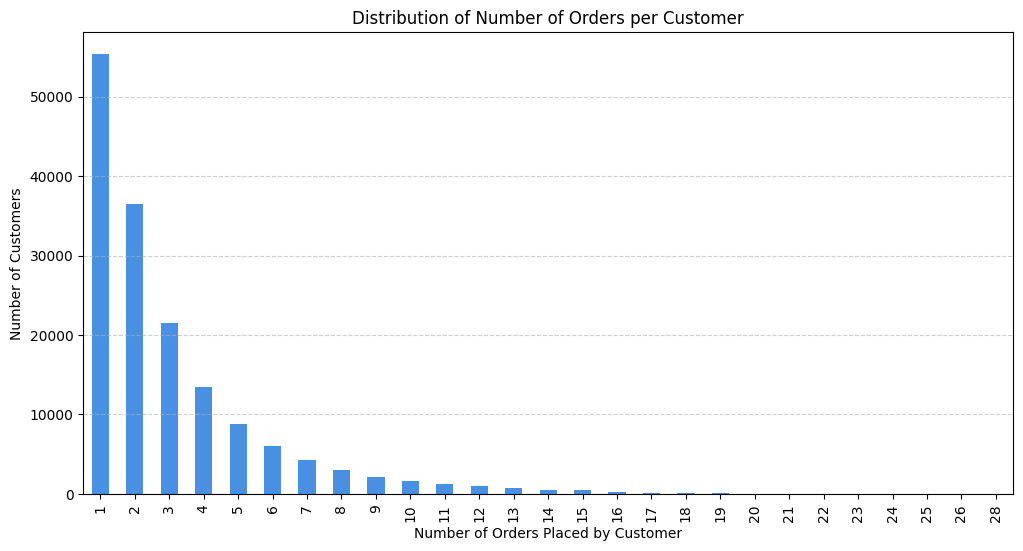

In [53]:
#plotting Histogram
distribution.plot(
    kind='hist',
    bins=100,
    figsize=(12,6)
)
plt.xlabel("Number of Orders Placed by Customer")
plt.ylabel("Number of Customers")
plt.title("Distribution of Number of Orders per Customer")
plt.show()

# Plotting a bar chart instead of a histogram for better clarity
plt.figure(figsize=(12, 6))
distribution.value_counts().sort_index().plot(kind='bar', color='#4A90E2')

# Customizing the plot for storytelling
plt.title("Distribution of Number of Orders per Customer")
plt.xlabel("Number of Orders Placed by Customer")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Can you please answer why do you think histogram is better here? For me, it doesn't make sense since the values are not continuous at the same time if I play on bins for the better visualization, it ends up as bar graph. then why not use bar graph?

Most customers in the dataset have placed between 1 and 10 orders, with number of orders per customer sharply decreasing after just 1 order.

### [B3] What are the top 20 popular products (display their id and name)?

To identify the top 20 most popular products:

1. **Merge the datasets**: Combine `order_products` and `products` on `product_id` to access both the product IDs and names in a single DataFrame.
2. **Group the data**: Group by both `product_id` and `product_name` to aggregate the order counts for each product using `.size()`.
3. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their popularity.
4. **Display the top 20**: Use `.head(20)` to focus on the most frequently ordered products.
5. **Visualize the results**: Create a bar chart to highlight the top products and their order counts.

This will give you a clear view of the most popular products and their ranking.


In [54]:
# Merge the datasets
merged_products = order_products.merge(products, on='product_id', how='outer')

# Grouping & Sorting by product id & product name
grouped_products = merged_products.groupby(['product_id','product_name']).size().sort_values(ascending=False)

In [55]:
# Displaying top 20
top_20_products = grouped_products.head(20).reset_index(name='Order Count')
display(top_20_products)

,product_id,product_name,Order Count
0,24852,Banana,66050
1,13176,Bag of Organic Bananas,53297
2,21137,Organic Strawberries,37039
3,21903,Organic Baby Spinach,33971
4,47209,Organic Hass Avocado,29773
5,47766,Organic Avocado,24689
6,47626,Large Lemon,21495
7,16797,Strawberries,20018
8,26209,Limes,19690
9,27845,Organic Whole Milk,19600


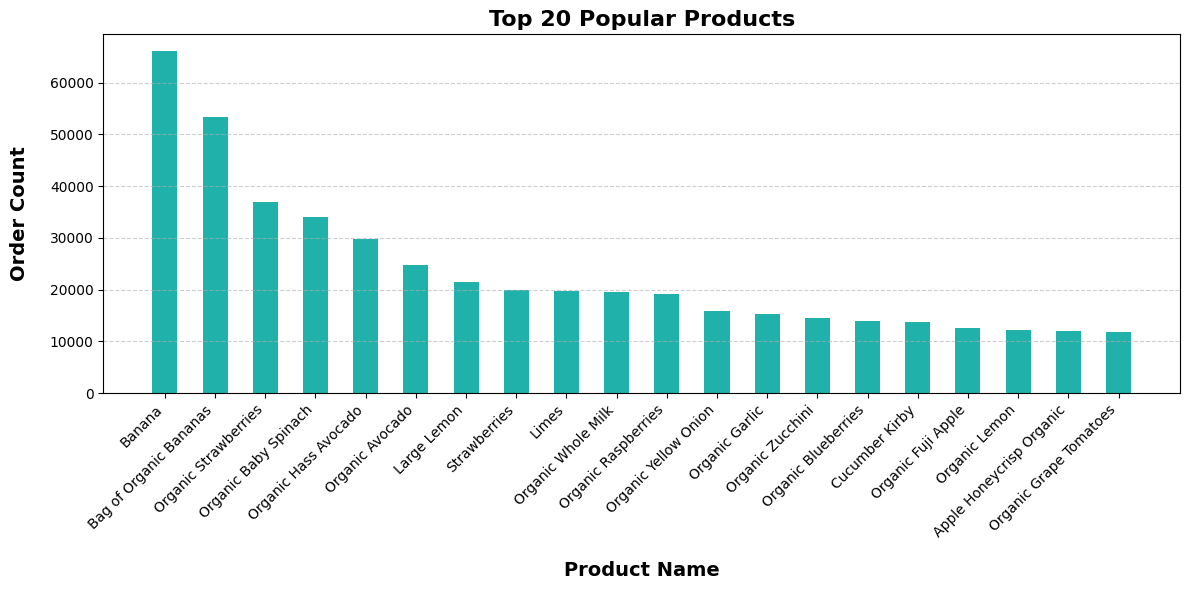

In [56]:
# Plotting the bar chart using only product names
plt.figure(figsize=(12, 6))
plt.bar(top_20_products['product_name'], top_20_products['Order Count'], color='#20B2AA', width=0.50)

# Customizing the plot
plt.title("Top 20 Popular Products", size=16, weight='bold')
plt.xlabel("Product Name", size=14, weight='bold', labelpad=15)
plt.ylabel("Order Count", size=14, weight='bold', labelpad=15)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The top 20 items are all produce, except for the milk. Looks like people want delicious and nutritious!

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?
To analyze how many items people typically buy in one order:

1. **Group the data** by `order_id` and count the number of products (`product_id`) in each order using `.count()`. This gives the number of items in each order.
2. **Aggregate the counts**: Use `.value_counts()` to determine how frequently different order sizes occur, and then sort the results with `.sort_index()` to organize by the number of items.
3. **Visualize the distribution**: Use a bar plot to show the frequency of orders for each size, with the x-axis representing the number of items and the y-axis representing the number of orders.

This will help you understand the typical size of a grocery order and identify any trends in purchasing behavior.

In [57]:
# Grouping Data to get the number of items in each order
num_of_items_each_order = order_products.groupby('order_id')['product_id'].count().value_counts().sort_index()
num_of_items_each_order                          

1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: product_id, Length: 90, dtype: int64

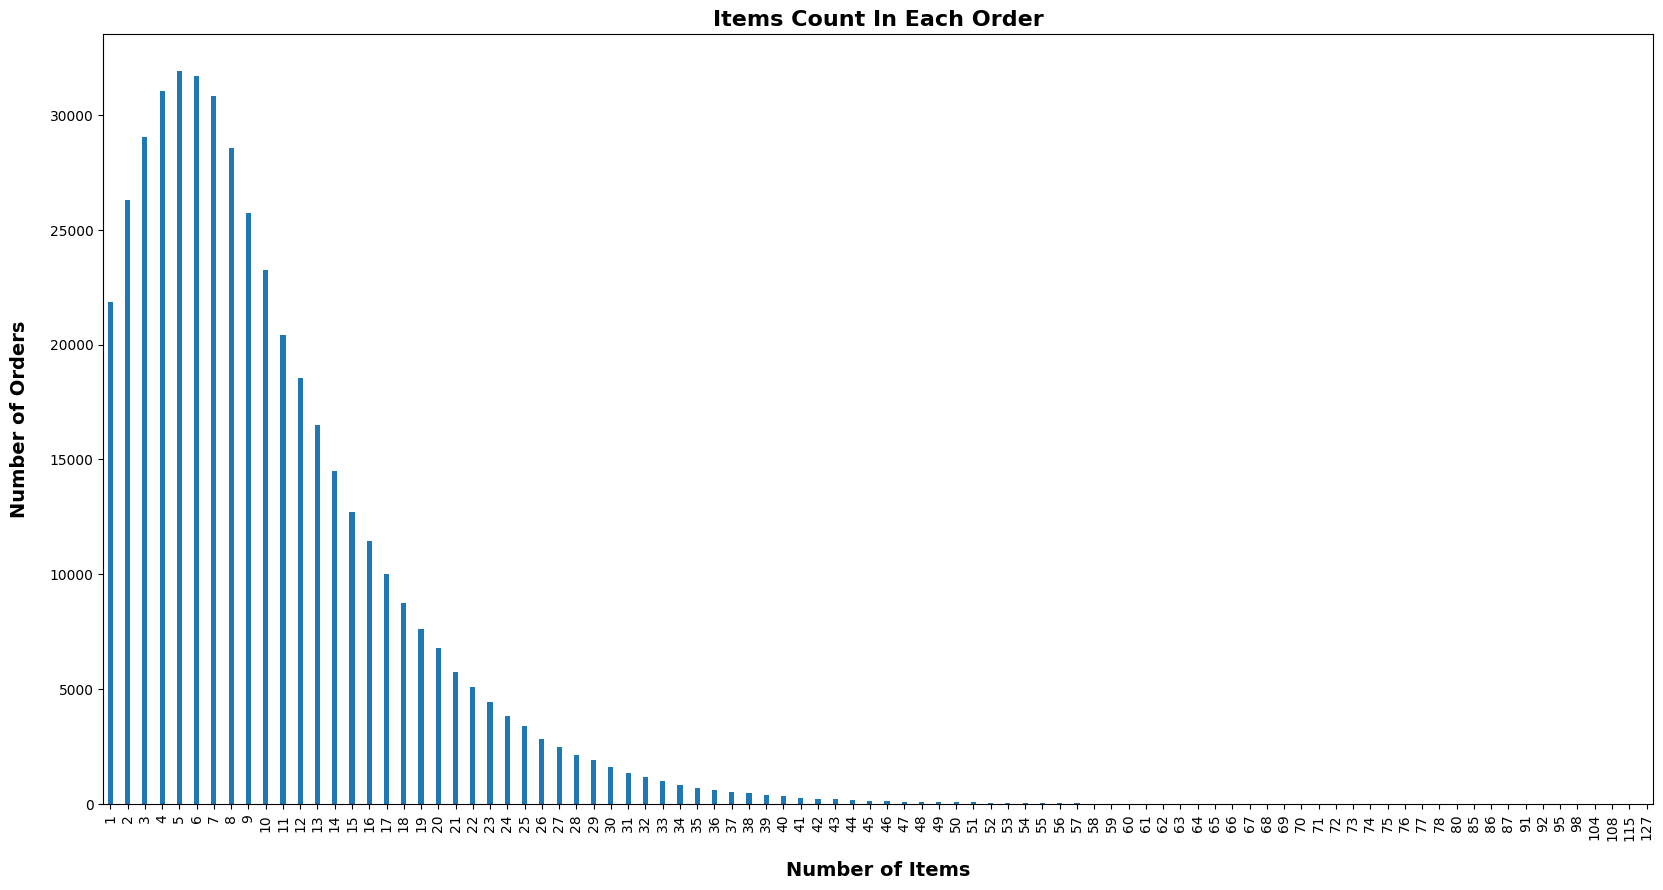

In [58]:
# Visualising the whole data
num_of_items_each_order.plot(kind='bar', figsize=[20,10], width=0.3)
plt.xlabel('Number of Items', size=14, weight='bold', labelpad=15)
plt.ylabel('Number of Orders', size=14, weight='bold', labelpad=15)
plt.title('Items Count In Each Order', size=16, weight='bold')
plt.show()

Most of the order numbers are in the tail of the distribution. To get a better look at the non-tail part, let's choose a value in the tail as a cutoff and just plot order with fewer than that many items. An order size of 35 items is far enough into the tail for this.

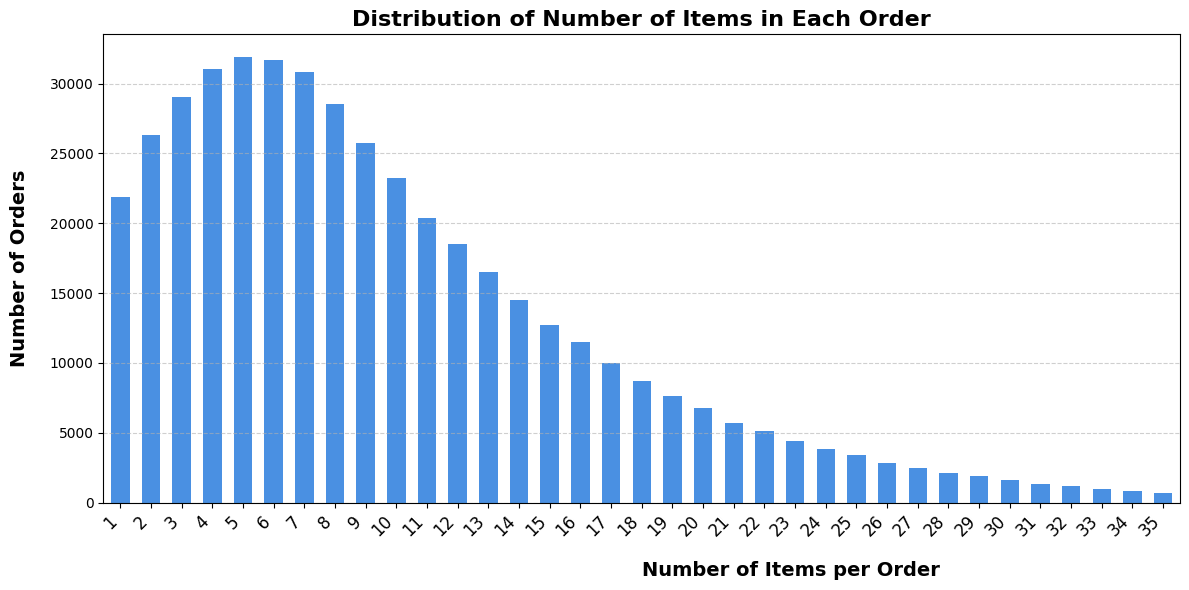

In [59]:
# Limiting the data to the first 35 items (avoiding the long tail)
num_of_items_each_order_limited = num_of_items_each_order[num_of_items_each_order.index <= 35]

# Plotting the improved bar chart
plt.figure(figsize=(12, 6))
num_of_items_each_order_limited.plot(kind='bar', color='#4A90E2', width=0.6)

# Customizing the plot for clarity
plt.title("Distribution of Number of Items in Each Order", fontsize=16, weight='bold')
plt.xlabel("Number of Items per Order", fontsize=14, weight='bold', labelpad=15, ha='left')
plt.ylabel("Number of Orders", fontsize=14, weight='bold', labelpad=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

The typical order contains 5 or 6 items, with most orders having between 1 and 20 items.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

To find the top 20 most frequently reordered items:

1. **Filter the data**: Use `order_products['reordered'] == 1` to isolate only the products that have been reordered.
2. **Merge the datasets**: Combine the filtered `order_products` with the `products` dataset on `product_id` to get both the product names and IDs.
3. **Group the data**: Group by both `product_id` and `product_name` to calculate how many times each product was reordered, using `.size()`.
4. **Sort the results**: Use `.sort_values(ascending=False)` to rank the products by reorder frequency.
5. **Display the top 20**: Use `.head(20)` to focus on the most frequently reordered products.
6. **Visualize the data**: Create a bar chart to showcase the top reordered items and their frequencies.

This process highlights the products that customers consistently return to and reorder.

In [60]:
# Filter the data
filter_reorder = order_products[order_products['reordered'] == 1]

In [61]:
# Merge the datasets
merged_reorder = filter_reorder.merge(products, on='product_id', how='outer')

# Group the data, Sort the results
group_reorder = merged_reorder.groupby(['product_id','product_name']).size().sort_values(ascending=False)

In [62]:
# Display the top 20
top_20_reorder = group_reorder.head(20).reset_index(name='Order Count')
top_20_reorder

,product_id,product_name,Order Count
0,24852,Banana,55763
1,13176,Bag of Organic Bananas,44450
2,21137,Organic Strawberries,28639
3,21903,Organic Baby Spinach,26233
4,47209,Organic Hass Avocado,23629
5,47766,Organic Avocado,18743
6,27845,Organic Whole Milk,16251
7,47626,Large Lemon,15044
8,27966,Organic Raspberries,14748
9,16797,Strawberries,13945


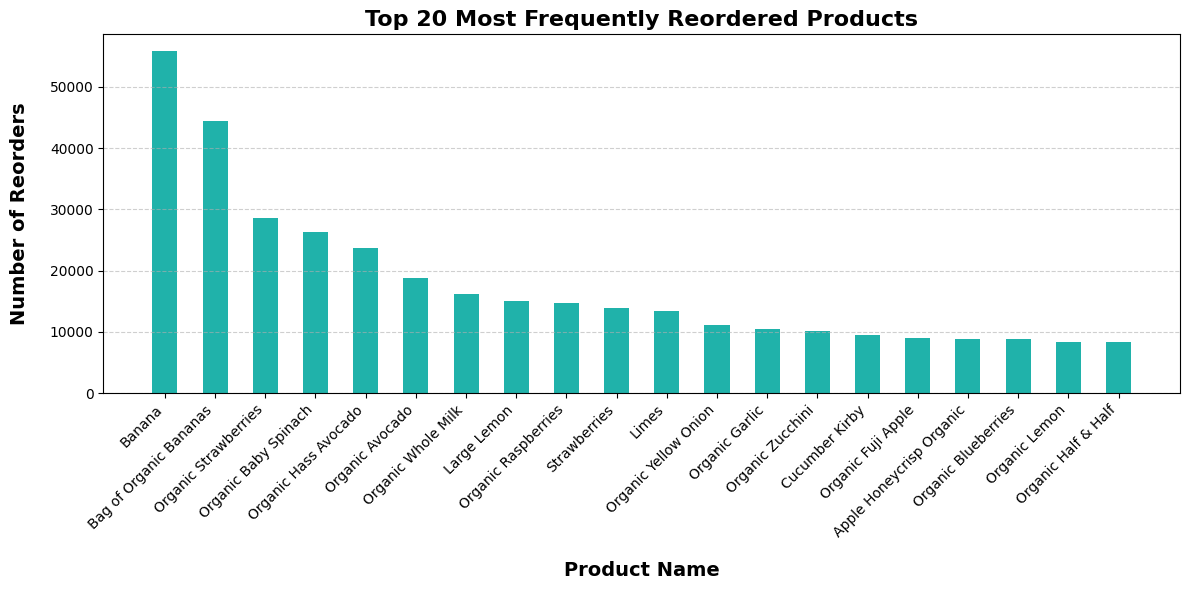

In [63]:
# Plotting the bar chart using only product names
plt.figure(figsize=(12, 6))
plt.bar(top_20_reorder['product_name'], top_20_reorder['Order Count'], color='#20B2AA', width=0.50)

# Customizing the plot
plt.title("Top 20 Most Frequently Reordered Products", size=16, weight='bold')
plt.xlabel("Product Name", size=14, weight='bold', labelpad=15)
plt.ylabel("Number of Reorders", size=14, weight='bold', labelpad=15)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

It looks like produce and dairy comprise the most reordered products as well. It makes sense that perishables would be the most reordered items.

### [C3] For each product, what proportion of its orders are reorders?

To calculate the proportion of orders for each product that are reorders:

1. **Merge the datasets**: Combine `order_products` with the `products` dataset to access product names and IDs in the same DataFrame.
2. **Group the data**: Group by `product_id` and `product_name` to isolate each product's order history.
3. **Calculate the mean of `reordered`**: Use `.mean()` on the `reordered` column to compute the proportion of orders for each product that were reorders. The value represents the reorder rate.
4. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their reorder rates.
5. **Convert to a DataFrame**: Use `.reset_index()` to organize the grouped data into a readable DataFrame.
6. **Optional Sorting**: Sort the results by `product_id` or another column for better clarity.

This approach provides insights into how frequently each product is reordered, helping identify customer favorites or staples.


In [64]:
# Merging the datasets
merge_data = order_products.merge(products, on='product_id', how='outer')

# Grouping product id and product name and mean
mean_reorder = merge_data.groupby(['product_id','product_name'])['reordered'].mean().reset_index()

In [65]:
# Sorting by reorer rate and renaming
mean_reorder = mean_reorder.sort_values("reordered").reset_index().rename(columns={'reordered':'avg_reorder'})

In [66]:
mean_reorder

,index,product_id,product_name,avg_reorder
0,19647,20154,Lightly Salted Corn Chips,0.0
1,36386,37316,Vanilla Oval Wafers,0.0
2,8221,8417,Unscented Sport Broad Spectrum SPF 35- All Sea...,0.0
3,8222,8418,Organic Sweetened Dried Cranberries,0.0
4,8223,8419,Dish Soap- Pink Grapefruit,0.0
...,...,...,...,...
48432,48368,49623,Freeze-Dried Powder Coconut Water,NaN
48433,48377,49632,Lavender & Bergamot Sleep Balm,NaN
48434,48387,49643,Tomatillo Salsa Cranberry-Mango,NaN
48435,48400,49656,Masada Kosher Pocket Bread,NaN


In [67]:
# Sorting by product id and renaming
mean_reorder_sorted = mean_reorder.sort_values('product_id').reset_index(drop=True)
mean_reorder_sorted

,index,product_id,product_name,avg_reorder
0,0,1,Chocolate Sandwich Cookies,0.564286
1,1,2,All-Seasons Salt,0.000000
2,2,3,Robust Golden Unsweetened Oolong Tea,0.738095
3,3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,0.510204
4,4,5,Green Chile Anytime Sauce,NaN
...,...,...,...,...
48432,48432,49690,HIGH PERFORMANCE ENERGY DRINK,0.800000
48433,48433,49691,ORIGINAL PANCAKE & WAFFLE MIX,0.430556
48434,48434,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,0.416667
48435,48435,49693,SPRING WATER BODY WASH,0.440000


### [C4] For each customer, what proportion of their products ordered are reorders?

To calculate the proportion of products reordered by each customer:

1. **Merge the datasets**: Combine `order_products` with `orders` to link order and customer information.
2. **Group the data**: Group by `user_id` to focus on each customer's ordering behavior.
3. **Calculate the mean of `reordered`**: Use `.mean()` on the `reordered` column to determine the proportion of products reordered by each customer.
4. **Sort the results**: Use `.sort_values(ascending=False)` to identify customers with the highest reorder rates.
5. **Convert to a DataFrame**: Use `.reset_index()` to format the grouped data into a structured DataFrame for further analysis.

This analysis reveals the extent to which individual customers reorder products, providing insights into customer loyalty and preferences.


In [68]:
# Merging order_products with order on order_id
customer_order_reorders_merged = order_products.merge(orders, on='order_id', how='outer')

# Grouping the data, & Mean
customer_order_reorders_grouped = customer_order_reorders_merged.groupby('user_id')['reordered'].mean()

# Sorting the result
customer_order_reorders_grouped =  customer_order_reorders_grouped.sort_values(ascending=False)

# Converting to DataFrame
customer_order_reorders_grouped.reset_index()

,user_id,reordered
0,137587,1.0
1,173474,1.0
2,13918,1.0
3,62300,1.0
4,62307,1.0
...,...,...
157432,206072,NaN
157433,206116,NaN
157434,206169,NaN
157435,206186,NaN


### [C5] What are the top 20 items that people put in their carts first?

To identify the top 20 items that people most frequently add to their carts first:

1. **Merge the datasets**: Combine `order_products` with `products` to link product names and IDs.
2. **Filter the data**: Focus on rows where `add_to_cart_order` equals 1, indicating the first item added to the cart.
3. **Group the data**: Group by `product_id` and `product_name` to aggregate the count of how often each product was the first in a cart.
4. **Count occurrences**: Use `.count()` to calculate the total number of times each product was the first added.
5. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their first-in-cart frequency.
6. **Display the top 20**: Use `.head(20)` to extract the most popular first-in-cart items.

This provides insights into which products customers prioritize in their shopping process.


In [69]:
# # Reviwer - For this cell block I tried my best to eye ball this since the Tripleten is bugging out for this process. 
# # Merging the datasets to link product names and IDs
# item_in_cart = order_products.merge(products, on='product_id', how='outer')

# # Filtering for the first item added to the cart
# first_item_to_cart = item_in_cart[item_in_cart['add_to_cart_order'] == 1]

# # Grouping by product_id and product_name, counting occurrences of first-in-cart
# item_to_cart_grouped = first_item_to_cart.groupby(['product_id', 'product_name'])['order_id'].count().reset_index(name='first_in_cart_count')

# # Sorting the results in descending order
# item_to_cart_sorted = item_to_cart_grouped.sort_values(by='first_in_cart_count', ascending=False)

# # Displaying the top 20 items
# top_20_in_cart = item_to_cart_sorted.head(20)

# top_20_in_cart

The products that are most often placed into the cart first are produce, dairy, and beverages such as soda or water. I couldn't really say why that is without experience using Instacart because this could have more to do with app design than properties of the products. I do notice that there is considerable overlap between this result and the previous result for most popular and most reordered item types. It could simply be that the app prioritizes popular items as the first suggested purchases, so it happens to be more convenient for customers to place these items in their cart first.